<a href="https://colab.research.google.com/github/vaibhavhirani/ML-Loan-Assignment/blob/main/ml_sv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import os
import sys
from google.colab import drive
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, auc

In [46]:
# mount G-Drive folder
drive.mount('/content/drive') 
os.listdir('/content/drive/MyDrive/ML_Loan/Ficoed')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['filtered_LoanStats_securev1_2017Q1.csv',
 'filtered_LoanStats_securev1_2017Q3.csv',
 'filtered_LoanStats_securev1_2017Q2.csv',
 'filtered_LoanStats3d_securev1_2015.csv',
 'filtered_LoanStats3c_securev1_2014.csv',
 'filtered_LoanStats.csv']

In [47]:
data = pd.read_csv('/content/drive/MyDrive/ML_Loan/Ficoed/filtered_LoanStats.csv')
data.describe()


,loan_amnt,installment,grade,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
count,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.00000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000
mean,0.347708,0.250675,0.307491,0.008510,0.783487,0.018371,0.008647,0.116261,0.121392,0.002791,0.006364,0.059238,0.143815,0.000914,0.000949,0.000030,0.034832,0.003186,0.090792,0.026776,0.001049,0.000135,0.213912,0.033532,0.037730,0.013647,0.121124,0.100154,0.074852,0.119733,0.058437,0.100625,0.104760,0.125669,0.130561,0.002418,0.086035,0.933073,0.012388,0.000669,0.017193,0.018506,0.027305,0.019856,0.179795,0.000164,0.499113,0.000002,0.104573,0.396148,0.296962,0.410759,0.292279,0.008653,0.223710,0.604349,0.000002,0.060307,0.004012,0.018026,0.010437,0.00645,0.048238,0.000586,0.009191,0.006014,0.000024,0.745061,0.254939,0.433754,0.566246,0.996716,0.003284,0.982037,0.017963
std,0.218878,0.149479,0.221944,0.007405,0.411868,0.008895,0.023302,0.163147,0.061438,0.007377,0.008703,0.026794,0.072844,0.007626,0.013482,0.001497,0.038492,0.003573,0.059552,0.032057,0.011708,0.007474,0.110724,0.041946,0.044334,0.034105,0.073334,0.057127,0.046096,0.069744,0.049837,0.054395,0.065740,0.070821,0.060619,0.013218,0.069922,0.098133,0.033192,0.004949,0.017355,0.017571,0.027645,0.020288,0.164272,0.012804,0.500000,0.001479,0.306002,0.489096,0.456920,0.491972,0.454810,0.092620,0.416731,0.488991,0.001479,0.238055,0.063212,0.133045,0.101629,0.08005,0.214270,0.024199,0.095429,0.077320,0.004904,0.435828,0.435828,0.495593,0.495593,0.057210,0.057210,0.132816,0.132816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [61]:
# Train-test split
y = data['loan_status']
X = data.drop(['loan_status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.describe()

,loan_amnt,installment,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
count,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.00000,365916.0,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000
mean,0.347648,0.250650,0.307446,0.008509,0.018379,0.008675,0.116374,0.121412,0.002782,0.006375,0.059241,0.143835,0.000920,0.000953,0.000030,0.034868,0.003189,0.090803,0.026798,0.001046,0.000134,0.213955,0.033547,0.037748,0.013634,0.121084,0.100122,0.074860,0.119753,0.058447,0.100603,0.104759,0.125622,0.130578,0.002424,0.086041,0.933078,0.012369,0.000666,0.017211,0.018520,0.027334,0.019863,0.179948,0.000159,0.49924,0.0,0.104469,0.396132,0.296798,0.410493,0.292709,0.008729,0.223458,0.604193,0.000003,0.060429,0.004031,0.018119,0.010431,0.006351,0.048306,0.000558,0.009221,0.006143,0.000027,0.745299,0.254701,0.433671,0.566329,0.996721,0.003279,0.982119,0.017881
std,0.218897,0.149544,0.222021,0.007278,0.009007,0.023451,0.163330,0.061434,0.007305,0.008683,0.026803,0.072851,0.007656,0.013444,0.001668,0.038555,0.003282,0.059543,0.032078,0.011737,0.007335,0.110699,0.042038,0.044335,0.034211,0.073364,0.057106,0.046144,0.069725,0.049867,0.054384,0.065703,0.070802,0.060609,0.013359,0.069893,0.098245,0.033209,0.004830,0.017356,0.017567,0.027712,0.020307,0.164426,0.012589,0.50000,0.0,0.305869,0.489093,0.456847,0.491924,0.455007,0.093019,0.416564,0.489024,0.001653,0.238281,0.063362,0.133382,0.101600,0.079441,0.214413,0.023605,0.095581,0.078139,0.005228,0.435693,0.435693,0.495582,0.495582,0.057173,0.057173,0.132520,0.132520
min,0.000000,0.005498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [50]:
len(X_train.columns)

74

In [67]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200,
                                max_features=0.25,
                                criterion="entropy",
                                class_weight="balanced")

rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print(f'Random Forest accuracy: {accuracy_score(y_test, y_pred_rf)}')

Random Forest accuracy: 0.8063599296013293


In [69]:
# Random Forest classification report
print(f'Random Forest classification report: {classification_report(y_test, y_pred_rf)}')

Random Forest classification report:               precision    recall  f1-score   support

         0.0       0.73      0.17      0.27     19856
         1.0       0.81      0.98      0.89     71623

    accuracy                           0.81     91479
   macro avg       0.77      0.58      0.58     91479
weighted avg       0.79      0.81      0.76     91479



In [71]:
# Random Forest confusion matrix
print(f'Random Forest confusion matrix:\n {confusion_matrix(y_test, y_pred_rf)}')

Random Forest confusion matrix:
 [[ 3357 16499]
 [ 1215 70408]]


In [72]:
# Random Forest ROC-AUC
print(f'Random Forest ROC-AUC Score: {roc_auc_score(y_test, y_pred_rf)}')

Random Forest ROC-AUC Score: 0.5760517299891162


Random Forest AUPRC score: 0.9032356473367532


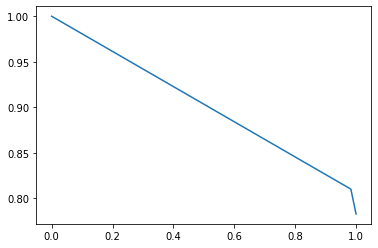

In [75]:
# Random Forest AUPRC
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rf)
print(f'Random Forest AUPRC score: {auc(recall_rf, precision_rf)}')

plt.plot(recall_rf, precision_rf)
plt.show()

In [76]:
ann = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(37, 12), random_state=1)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
print(f'ANN Accuracy: {accuracy_score(y_test, y_pred_ann)}')

ANN Accuracy: 0.8070267493085845


In [77]:
# ANN confusion matrix
print(f'ANN classification report: {classification_report(y_test, y_pred_ann)}')

ANN classification report:               precision    recall  f1-score   support

         0.0       0.67      0.22      0.33     19856
         1.0       0.82      0.97      0.89     71623

    accuracy                           0.81     91479
   macro avg       0.74      0.59      0.61     91479
weighted avg       0.79      0.81      0.77     91479



In [79]:
# ANN confusion matrix
print(f'ANN confusion matrix: \n{confusion_matrix(y_test, y_pred_ann)}')

ANN confusion matrix: 
[[ 4331 15525]
 [ 2128 69495]]


In [80]:
# ANN ROC-AUC
print(f'ANN ROC-AUC Score: {roc_auc_score(y_test, y_pred_ann)}')

ANN ROC-AUC Score: 0.5942046705254277


Random Forest AUPRC score: 0.9032356473367532


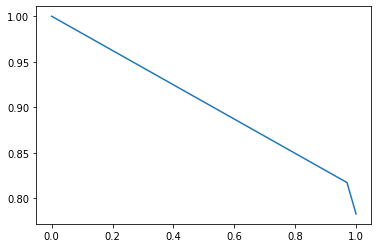

In [81]:
# ANN AUPRC
precision_ann, recall_ann, thresholds_ann = precision_recall_curve(y_test, y_pred_ann)
print(f'Random Forest AUPRC score: {auc(recall_rf, precision_rf)}')

plt.plot(recall_ann, precision_ann)
plt.show()